# __Глава I__ 
***
### __Задачи__ 
* 8.19
* 9.2
* 9.3

__Задачник:__ Аристова Е.Н, Завьялова Н.А., Лобанов А.И. Практические занятия по вычислительной математике. Часть I. — Москва : Изд-во МФТИ, 2014. — 242 с.

__Задание выполнил:__ Быков Дмитрий, гр. С01-919

In [16]:
import sympy as sp
import numpy as np
import math

__name__ = "MacLaren"

def MacAppr(func, var, interval, error):
    m_series = 0
    limit_n  = 0

    for t_current in np.arange(interval[0], interval[1] + error, error):
        while (True):
            m_series = 0
            m_series = sum((sp.diff(func, var, m)).evalf(subs={var:0}) * t_current**m / math.factorial(m) for m in range(limit_n))
            
            if (abs(func.evalf(subs={var:t_current}) - m_series) < error): break
            else: limit_n += 1

    print('Число \"n\" для функции ', func, ' на отрезке [', interval[0], ', ', interval[1], '] равно ', limit_n, sep = '')


def main():
    #t = sp.Symbol('t') -> sp.exp(t)...
    
    #Input Data
    MacAppr(sp.exp(sp.Symbol('t')), sp.Symbol('t'), [0,1],   10**(-3))
    MacAppr(sp.sin(sp.Symbol('t')), sp.Symbol('t'), [0,1],   10**(-3))

    MacAppr(sp.exp(sp.Symbol('t')), sp.Symbol('t'), [11,12], 10**(-3))
    MacAppr(sp.sin(sp.Symbol('t')), sp.Symbol('t'), [11,12], 10**(-3))

if __name__ == "MacLaren":
    main()

Число "n" для функции exp(t) на отрезке [0, 1] равно 7
Число "n" для функции sin(t) на отрезке [0, 1] равно 6
Число "n" для функции exp(t) на отрезке [11, 12] равно 37
Число "n" для функции sin(t) на отрезке [11, 12] равно 36


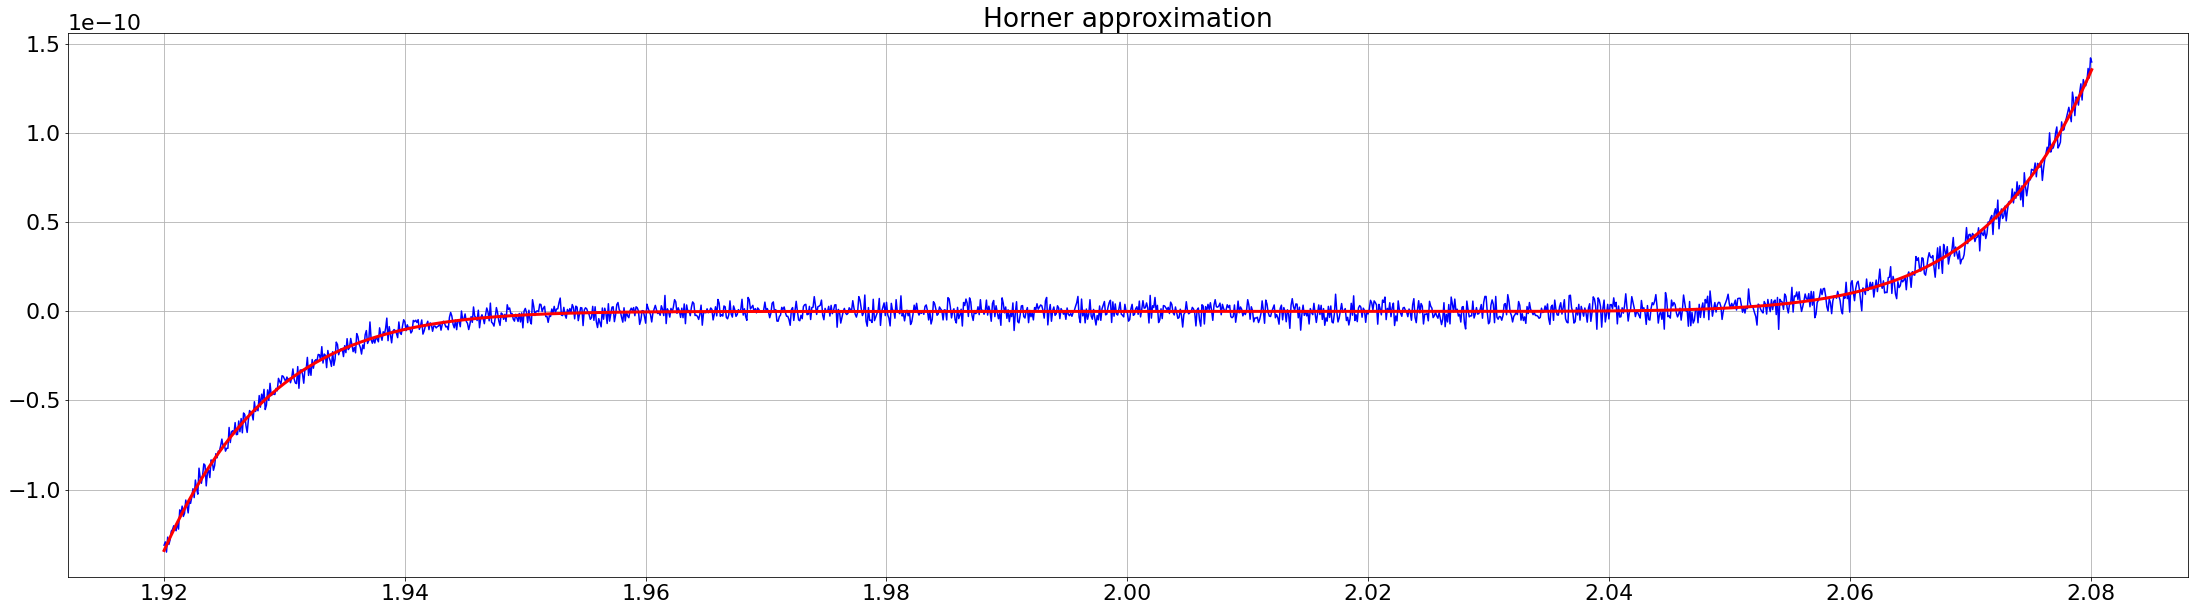

In [14]:
import matplotlib.pyplot as plot  
import numpy as np

__name__ = "Horner"

def Horner(poly_coef, n, x):
    result = poly_coef[0]
    for i in range(1, n): result = result * x + poly_coef[i]
    return result

def main():
    #Input Data
    polynom  = [1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512]
    interval = [1.92, 2.08]
    step     = 10 ** (-4)
    
    x_array  = np.arange(interval[0], interval[1] + step, step)
    
    #Values
    horner_value = Horner(polynom, len(polynom), x_array)
    poly_value   = (x_array - 2)**9

    #Graphs appearance
    plot.figure(figsize = (38, 10))
    plot.title('Horner approximation')
    plot.rc('font', **{'size' : 22})
    plot.grid()

    #Graph data
    plot.plot(x_array, horner_value, color = 'blue')
    plot.plot(x_array, poly_value, color = 'red', linewidth = 3)
    plot.show()
        
if __name__ == "Horner":
    main()

In [2]:
import math

__name__ = "EulerConst"

def main():
#Input data
    eul_const = 0                       #our  Euler's constant
    eul_real  = 0.57721566490153286061  #real Euler's constant
    inner_sum = 0                       #Inner sum
    max_appr  = 1                       #Zero iteration
    error     = 10**(-10)               #Error of calc

    while (abs(eul_real - eul_const) >= error):
        #As an option for n += 10, but it will take a longer time
        #
        #   for n in range(max_appr): inner_sum += 1/(n + 1)
        #       inner_sum = 0

        inner_sum += 1 / max_appr
        max_appr  += 1
        eul_const  = inner_sum - math.log1p(max_appr)

    print('Число n, при котором получилась приближенная константа:', max_appr)
    print('Реальная константа  (20 зн):', eul_real, '\nКонстанта программы (10 зн):', eul_const)

if __name__ == "EulerConst":
    main()

Число n, при котором получилась приближенная константа: 8465285536
Реальная константа  (20 зн): 0.5772156649015329 
Константа программы (10 зн): 0.5772156648015354
